In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/train.csv')

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

### 1.Ê¶ÇË¶ÅÔºàOverviewÔºâ

„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„ÅØ1460‰ª∂„ÄÅ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÇÇ1460‰ª∂„ÅÇ„Çä„Åæ„Åô„ÄÇ
Â±ûÊÄßÔºàÁâπÂæ¥ÈáèÔºâ„ÅÆÁ∑èÊï∞„ÅØ81ÂÄã„Åß„ÄÅ„Åù„ÅÆ„ÅÜ„Å° 36ÂÄã„ÅåÈáèÁöÑÔºàquantitativeÔºâÁâπÂæ¥Èáè„ÄÅ43ÂÄã„Åå„Ç´„ÉÜ„Ç¥„É™ÔºàcategoricalÔºâÁâπÂæ¥Èáè„ÄÅ„Åï„Çâ„Å´ Id„Å®SalePrice „ÇíÂê´„Åø„Åæ„Åô„ÄÇ


### 2.ÈáèÁöÑÁâπÂæ¥ÈáèÔºàQuantitativeÔºâ:

1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2,
BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces,
FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath,
KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea,
MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea,
ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold


### 3.„Ç´„ÉÜ„Ç¥„É™ÁâπÂæ¥ÈáèÔºàQualitativeÔºâ:

Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond,
ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation,
Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating,
HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig,
LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive,
PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

In [2]:
missing = train.isnull().sum()

- train.isnull()Ôºötrain „Éá„Éº„Çø„Éï„É¨„Éº„É†ÂÜÖ„ÅÆÊ¨†ÊêçÂÄ§ÔºàNaNÔºâ„ÇíTrue„ÄÅ„Åù„Çå‰ª•Â§ñ„ÇíFalse„Å®„Åô„Çã„Éû„Çπ„ÇØ„Çí‰ΩúÊàê„ÄÇ

- .sum()ÔºöÂêÑÂàó„Åî„Å®„Å´ True „ÅÆÊï∞Ôºà= Ê¨†ÊêçÂÄ§„ÅÆÂÄãÊï∞Ôºâ„ÇíÂêàË®à„ÄÇ

### 4.Ê¨†ÊêçÂÄ§

In [3]:
missing = missing[missing > 0]

- Ê¨†ÊêçÂÄ§„Åå1„Å§‰ª•‰∏ä„ÅÇ„ÇãÂàó„Å†„Åë„Å´Áµû„ÇäËæº„Åø„ÄÇ

- Ê¨†Êêç„Åå0„ÅÆÂàó„ÅØÁÑ°Ë¶ñ„Åó„Å¶„ÄÅÂàÜÊûê„Å´‰∏çË¶Å„Å™ÊÉÖÂ†±„ÇíÂâäÈô§„ÄÇ

<Axes: >

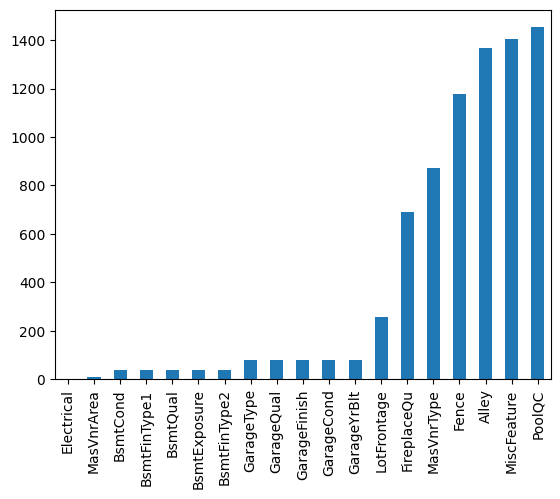

In [4]:
missing.sort_values(inplace=True)
missing.plot.bar()

19ÂÄã„ÅÆÂ±ûÊÄß„Å´Ê¨†ÊêçÂÄ§„Åå„ÅÇ„Çä„ÄÅ„Åù„ÅÆ„ÅÜ„Å°5„Å§„ÅØÂÖ®„Éá„Éº„Çø„ÅÆ50%‰ª•‰∏ä„ÅåÊ¨†Êêç„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ
Â§ö„Åè„ÅÆÂ†¥Âêà„ÄÅNAÔºàÊ¨†ÊêçÂÄ§Ôºâ„ÅØ„Åù„ÅÆÂ±ûÊÄß„ÅßË°®„Åï„Çå„ÇãÂØæË±°„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Åì„Å®„ÇíÊÑèÂë≥„Åó„Åæ„Åô„ÄÇ
‰æã„Åà„Å∞„ÄÅ„Éó„Éº„É´„ÇÑ„Éï„Çß„É≥„Çπ„Åå„Å™„ÅÑ„ÄÅ„Ç¨„É¨„Éº„Ç∏„ÇÑÂú∞‰∏ãÂÆ§„Åå„Å™„ÅÑ„Å®„ÅÑ„Å£„Åü„Ç±„Éº„Çπ„Åß„Åô„ÄÇ

### 5.ÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂ∏É

In [5]:
import scipy.stats as st
y = train['SalePrice']

- scipy.stats „Çí st „Å®„Åó„Å¶„Ç§„É≥„Éù„Éº„Éà„ÄÇ
- ÂêÑÁ®ÆÁ¢∫ÁéáÂàÜÂ∏ÉÔºàÊ≠£Ë¶èÂàÜÂ∏É„ÄÅÂØæÊï∞Ê≠£Ë¶èÂàÜÂ∏É„ÄÅJohnson SUÂàÜÂ∏É„Å™„Å©Ôºâ„Å´„Ç¢„ÇØ„Çª„Çπ„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åó„Åæ„Åô„ÄÇ



C:\Users\tatib\AppData\Local\Temp\ipykernel_18000\1515662550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
C:\Users\tatib\AppData\Local\Temp\ipykernel_18000\1515662550.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
C:\Users\ta

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice'>

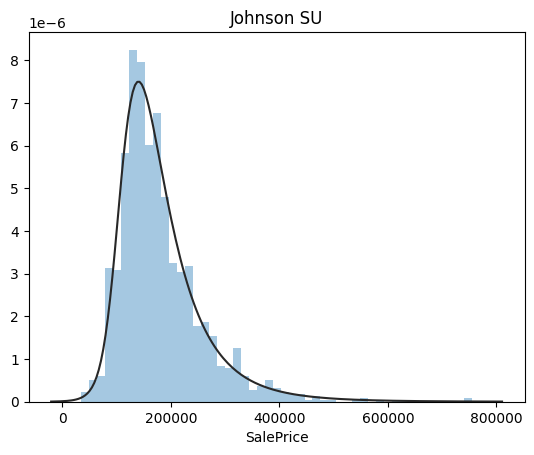

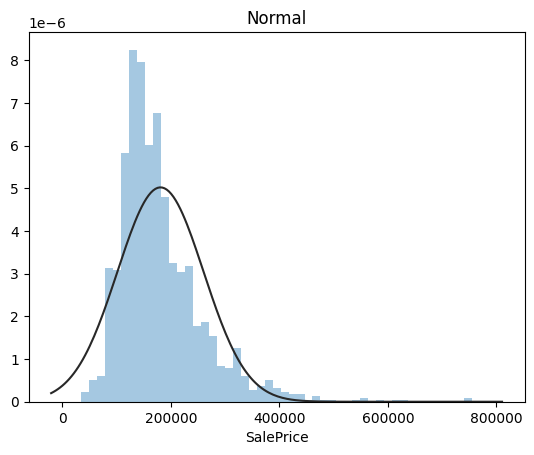

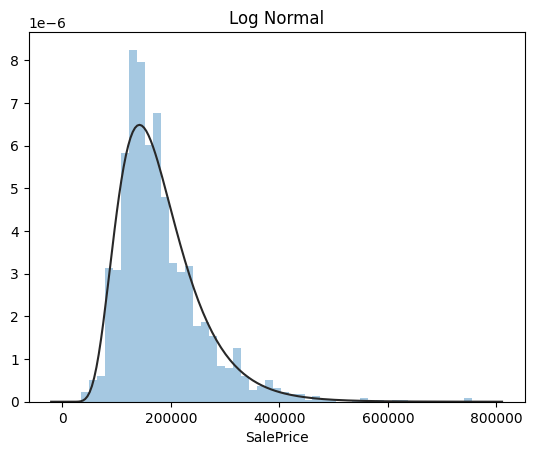

In [6]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

- plt.figure(1)Ôºö1„Å§ÁõÆ„ÅÆ„Éó„É≠„ÉÉ„Éà„Ç¶„Ç£„É≥„Éâ„Ç¶„Çí‰ΩúÊàê„ÄÇ

- plt.title('Johnson SU')Ôºö„Çø„Ç§„Éà„É´„ÇíË®≠ÂÆö„ÄÇ

- sns.distplot(...)Ôºöy „ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÇíÊèèÁîªÔºàkde=False „Åß„Ç´„Éº„Éç„É´ÂØÜÂ∫¶Êé®ÂÆö„ÅØÁÑ°ÂäπÔºâfit=st.johnsonsu „Åß„ÄÅJohnson SUÂàÜÂ∏É„Å´„Éï„Ç£„ÉÉ„ÉÜ„Ç£„É≥„Ç∞„Åï„Çå„Åü„Ç´„Éº„Éñ„ÇíË°®Á§∫„ÄÇ

SalePriceÔºàË≤©Â£≤‰æ°Ê†ºÔºâ„ÅåÊ≠£Ë¶èÂàÜÂ∏É„Å´Âæì„Å£„Å¶„ÅÑ„Å™„ÅÑ„Åì„Å®„ÅØÊòé„Çâ„Åã„Å™„ÅÆ„Åß„ÄÅÂõûÂ∏∞ÂàÜÊûê„ÇíË°å„ÅÜÂâç„Å´Â§âÊèõ„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ
**ÂØæÊï∞Â§âÊèõÔºàlog transformationÔºâ**„ÅØ„Åã„Å™„Çä„ÅÜ„Åæ„ÅèÊ©üËÉΩ„Åó„Åæ„Åô„Åå„ÄÅÊúÄ„ÇÇÈÅ©Âêà„Åô„Çã„ÅÆ„ÅØÈùûÊúâÁïå„ÅÆ Johnson ÂàÜÂ∏É„Åß„Åô„ÄÇ

### Ê≠£Ë¶èÊÄß„ÅÆÊ§úÂÆöÔºà„Ç∑„É£„Éî„É≠„Éª„Ç¶„Ç£„É´„ÇØÊ§úÂÆöÔºâ

In [7]:

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01

stats.shapiro(x.fillna(0))Ôºö
- „Ç∑„É£„Éî„É≠„Éª„Ç¶„Ç£„É´„ÇØÊ§úÂÆö„ÇíÂÆüË°å„ÄÇ
- Ê¨†ÊêçÂÄ§„ÅØÔºê„ÅßÂüã„ÇÅ„Å¶„Åã„ÇâÊ§úÂÆö
- Êàª„ÇäÂÄ§„ÅØÔºàÁµ±Ë®àÈáè„ÄÅÔΩêÂÄ§Ôºâ„ÅÆ„Çø„Éó„É´
[1] < 0.01:pÂÄ§„Åå0.01Êú™Ê∫Ä„Å™„ÇâÊ≠£Ë¶èÂàÜÂ∏É„Åß„Å™„ÅÑ„Å®Âà§Êñ≠ÔºàÂÑ™‰ΩçÊ∞¥Ê∫ñÔºëÔºÖÔºâ

In [8]:
normal = pd.DataFrame(train[quantitative])

normal = pd.DataFrame(train[quantitative])ÔºöÊï∞ÂÄ§ÁâπÂæ¥Èáè„Å†„ÅëÂèñ„ÇäÂá∫„Åó„Å¶„ÄÅDataFrame normal „Çí‰ΩúÊàê„ÄÇ

In [9]:
normal = normal.apply(test_normality)

normal = normal.apply(test_normality)Ôºö
- ÂêÑÊï∞ÂÄ§Âàó„Å´ÂØæ„Åó„Å¶ test_normality „ÇíÈÅ©Áî®ÔºàÂàó„Åî„Å®„ÅÆ„Ç∑„É£„Éî„É≠Ê§úÂÆöÔºâ„ÄÇ
- ÁµêÊûú„ÅØ True/False „ÅÆ SeriesÔºàTrue ÔºùÊ≠£Ë¶èÂàÜÂ∏É„Å´Âæì„Å£„Å¶„ÅÑ„Å™„ÅÑÔºâ„ÄÇ

In [10]:
print(not normal.any())

False


not normal.any()Ôºö

- ÂÖ®„Å¶„ÅÆÊï∞ÂÄ§Âàó„ÅåÊ≠£Ë¶èÂàÜÂ∏É„Å´Âæì„Å£„Å¶„ÅÑ„Çã„Å™„Çâ True

- 1„Å§„Åß„ÇÇÂæì„Å£„Å¶„ÅÑ„Å™„ÅÑÂàó„Åå„ÅÇ„Çå„Å∞ False

„Åæ„Åü„ÄÅ„Å©„ÅÆÈáèÁöÑÂ§âÊï∞Ôºàquantitative variablesÔºâ„ÇÇÊ≠£Ë¶èÂàÜÂ∏É„Å´Âæì„Å£„Å¶„ÅÑ„Å™„ÅÑ„Åü„ÇÅ„ÄÅ„Åì„Çå„Çâ„ÇÇÂ§âÊèõÔºàtransformÔºâ„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

In [11]:
f = pd.melt(train, value_vars=quantitative)

f = pd.melt(train, value_vars=quantitative):
- pd.melt() „ÅØ„ÄåÂàó„ÇíÁ∏¶Èï∑„Å´Â§âÊèõÔºàlongÂΩ¢Âºè„Å´Â§âÊèõÔºâ„Äç„Åô„ÇãÈñ¢Êï∞„ÄÇ
- value_vars=quantitativeÔºöÈáèÁöÑÂ§âÊï∞ÔºàÊï∞ÂÄ§ÁâπÂæ¥ÈáèÔºâ„Å†„Åë„ÇíÂ§âÊèõÂØæË±°„Å®„Åô„Çã„ÄÇ
- Â§âÊèõÂæå„ÅØ„ÄÅ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™ÂΩ¢„ÅÆDataFrame„Å´„Å™„Çä„Åæ„ÅôÔºö


In [12]:
print(f)

         variable   value
0      MSSubClass    60.0
1      MSSubClass    20.0
2      MSSubClass    60.0
3      MSSubClass    70.0
4      MSSubClass    60.0
...           ...     ...
52555      YrSold  2007.0
52556      YrSold  2010.0
52557      YrSold  2010.0
52558      YrSold  2010.0
52559      YrSold  2008.0

[52560 rows x 2 columns]


![]('./img/image.png')

c:\Users\tatib\EDA\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\tatib\EDA\.venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\tatib\EDA\.venv\Lib\s

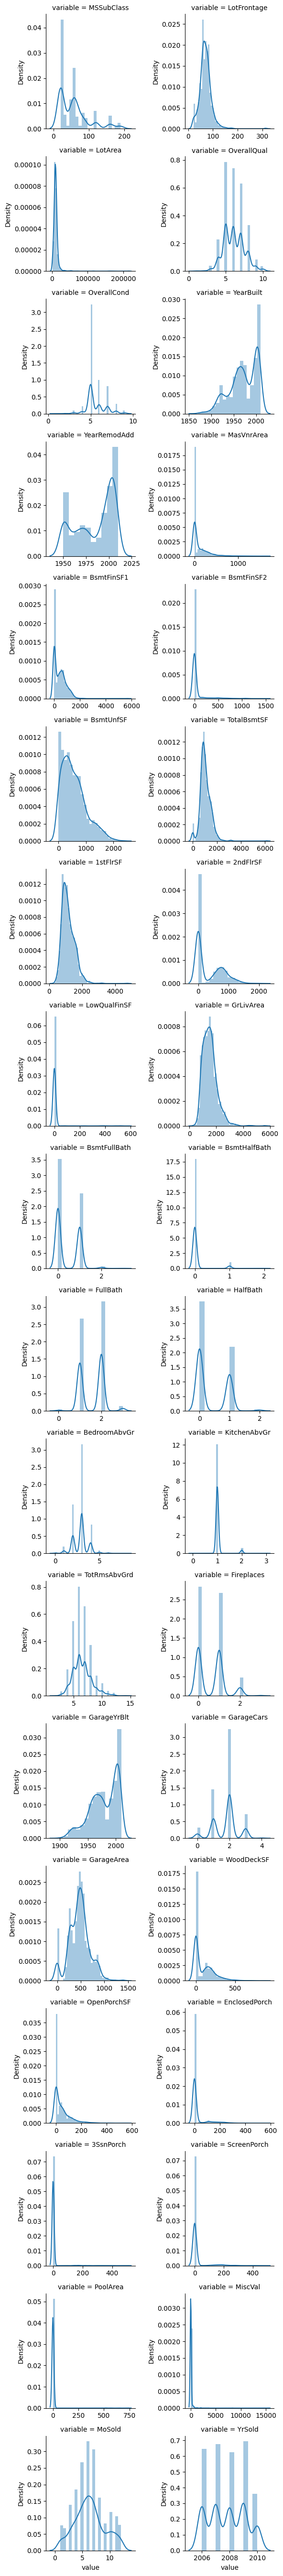

In [13]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False):

- Seaborn „ÅÆ FacetGrid „Çí‰Ωø„Å£„Å¶Ë§áÊï∞„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„ÇãÊ∫ñÂÇô„Çí„Åó„Åæ„Åô„ÄÇ

- col="variable"ÔºövariableÔºàÂ§âÊï∞ÂêçÔºâ„Åî„Å®„Å´ÂÄãÂà•„ÅÆ„Ç∞„É©„Éï„Çí‰ΩúÊàê„ÄÇ

- col_wrap=2Ôºö2Âàó„Å´Êäò„ÇäËøî„Åó„Å¶‰∏¶„Åπ„Çã„ÄÇ

- sharex=False, sharey=FalseÔºö„Åù„Çå„Åû„Çå„ÅÆ„Ç∞„É©„Éï„Åß xËª∏„ÉªyËª∏„ÇíÁã¨Á´ã„Åï„Åõ„Çã„ÄÇ



„ÅÑ„Åè„Å§„Åã„ÅÆÁã¨Á´ãÂ§âÊï∞„ÅØ„ÄÅÂØæÊï∞Â§âÊèõÔºàlog transformationÔºâ„Å´ÈÅ©„Åó„ÅüÂÄôË£ú„Å´Ë¶ã„Åà„Åæ„Åô„ÄÇ
„Åü„Å®„Åà„Å∞„ÄÅTotalBsmtSFÔºàÂú∞‰∏ã„ÅÆÁ∑èÈù¢Á©çÔºâ„ÄÅKitchenAbvGrÔºàÂú∞‰∏äÈöé„ÅÆ„Ç≠„ÉÉ„ÉÅ„É≥Êï∞Ôºâ„ÄÅLotFrontageÔºàÊï∑Âú∞„ÅÆÈñìÂè£Ôºâ„ÄÅLotAreaÔºàÊï∑Âú∞Èù¢Á©çÔºâ„Å™„Å©„Åß„Åô„ÄÇ

‰∏ÄÊñπ„Åß„ÄÅÂõûÂ∏∞„É¢„Éá„É´„Å´ÊúâÂà©„Å™„Çà„ÅÜ„Å´Â§âÊèõ„ÇíË°å„ÅÜ„Åì„Å®„Åß„ÄÅ2Èöé„Åå„Å™„ÅÑ‰ΩèÂÆÖ„ÅåÂ§ö„ÅÑÔºà2ndFlrSF „Åå 0 „ÅÆ‰ª∂Êï∞„ÅåÂ§ö„ÅÑÔºâ„Å®„ÅÑ„Å£„Åü‰∏çË¶èÂâá„Å™„Éë„Çø„Éº„É≥„ÅåÂπ≥ÊªëÂåñ„Åï„Çå„Å¶„Åó„Åæ„ÅÜÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

„Åì„ÅÜ„Åó„Åü‰∏çË¶èÂâáÊÄß„ÅØ„ÄÅÊñ∞„Åó„ÅÑÁâπÂæ¥Èáè„ÅÆÊßãÁØâÔºàfeature constructionÔºâ„Å´ÈÅ©„Åó„ÅüÊÉÖÂ†±Ê∫ê„Å®„Å™„ÇäÂæó„Åæ„Åô„ÄÇ

### Categorical Data

### Áõ∏Èñ¢‰øÇÊï∞

‰∏ÄËà¨ÁöÑ„Å´„ÄÅ‰∫§Áµ°ÔºàconfoundingÔºâ„ÇíÊ∏õ„Çâ„Åô„Åü„ÇÅ„Å´„ÅØ„ÄÅ‰∫í„ÅÑ„Å´Áõ∏Èñ¢„Åó„Å¶„ÅÑ„Å™„ÅÑÂ§âÊï∞„Å†„Åë„ÇíÂõûÂ∏∞„É¢„Éá„É´„Å´Âä†„Åà„Çã„Åπ„Åç„Åß„ÅôÔºà„Åü„Å†„Åó„ÄÅ„Åù„Çå„Çâ„ÅØ SalePrice „Å®Áõ∏Èñ¢„Åó„Å¶„ÅÑ„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„ÅôÔºâ„ÄÇ

In [14]:
def spearman(frame,features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'],'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = quantitative + qual_encoded

spearman(train, features)
    

NameError: name 'qual_encoded' is not defined

### Price Segments

SalePriceÔºàË≤©Â£≤‰æ°Ê†ºÔºâ„ÅÆÂ§âÂåñ„Å´‰º¥„ÅÑ„ÄÅÁõ∏Èñ¢Èñ¢‰øÇ„ÅåÂ§âÂåñ„Åô„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ

In [ ]:
# uantitative „ÅØÊï∞ÂÄ§Âûã„ÅÆÁâπÂæ¥Èáè„ÅÆ„É™„Çπ„Éà
features = quantitative

# „Éá„Éº„ÇøÂàÜÂâ≤
standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

# ÂêÑÁâπÂæ¥Èáè„Å´„Å§„ÅÑ„Å¶„ÄÅdifference„ÅÆÂÄ§„ÇíÊ£í„Å®„Åó„Å¶Ë®àÁÆó
sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

- `fillna(0.)`Ôºö
  - Ê¨†ÊêçÂÄ§„Çí 0 „Å´ÁΩÆ„ÅçÊèõ„Åà„Å¶„ÅÑ„Åæ„ÅôÔºàÊ¨†Êêç„ÇíÁÑ°Ë¶ñ„Åõ„Åö„Å´Âπ≥Âùá„ÇíÂèñ„Çã„Åü„ÇÅÔºâ„ÄÇ

- `(pricey[f].mean() - standard[f].mean()) / standard[f].mean()`Ôºö
  - ÂêÑÁâπÂæ¥Èáè `f` „Å´„Åä„Åë„ÇãÈ´ò‰æ°Ê†ºÂ∏Ø„Å®‰Ωé‰æ°Ê†ºÂ∏Ø„ÅÆ **Áõ∏ÂØæÁöÑ„Å™Âπ≥Âùá„ÅÆÈÅï„ÅÑ** „ÇíÊ±Ç„ÇÅ„Å¶„ÅÑ„Åæ„Åô„ÄÇ
  - Âºè„ÅØ„ÄÅ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™ **Áõ∏ÂØæË™§Â∑ÆÔºàrelative errorÔºâ** „Å´Ëøë„ÅÑÔºö

  $$
  \text{difference} = \frac{\text{È´ò‰æ°Ê†ºÂ∏ØÂπ≥Âùá} - \text{‰Ωé‰æ°Ê†ºÂ∏ØÂπ≥Âùá}}{\text{‰Ωé‰æ°Ê†ºÂ∏ØÂπ≥Âùá}}
  $$


„Åì„Åì„Åß„ÅØ‰ΩèÂÆÖ„Çí2„Å§„ÅÆ‰æ°Ê†ºÂ∏Ø„Å´ÂàÜ„Åë„Å¶„ÅÑ„Åæ„ÅôÔºöÂÆâ‰æ°Ôºà20‰∏áÊú™Ê∫ÄÔºâ„Å®È´ò‰æ°„ÄÇ„Åù„Çå„Åã„ÇâÊï∞ÂÄ§Â§âÊï∞„ÅÆÂπ≥Âùá„ÇíÊØîËºÉ„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇÈ´ò‰æ°Ê†ºÂ∏Ø„ÅÆ‰ΩèÂÆÖ„ÅØ„Éó„Éº„É´„Åå„ÅÇ„Çä„ÄÅÂÖ®‰ΩìÁöÑ„Å™ÂìÅË≥™„Å®Áä∂ÊÖã„ÅåËâØ„Åè„ÄÅ„Ç™„Éº„Éó„É≥„Éù„Éº„ÉÅ„Åå„ÅÇ„Çä„ÄÅMasVnrAreaÔºàÁü≥Êùê„Éô„Éã„Ç¢Èù¢Á©çÔºâ„ÅÆÈáçË¶ÅÊÄß„ÅåÈ´ò„Åæ„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ



### Clustering

In [ ]:
features = quantitative + qual_encoded

### Regression

In [ ]:
def error(actual,predicted):
    """
    ÂØæÊï∞„Çπ„Ç±„Éº„É´„Åß„ÅÆRMSE(Root Mean Squared Error)„ÇíË®àÁÆó„Åô„Çã„ÄÇ 
    """
    actual = np.log(actual)
    predicted  = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual - predicted)) / len(actual))

np.log(actual)Ôºö

- ÂÆüÊ∏¨ÂÄ§„Å´ÂØæ„Åó„Å¶Ëá™ÁÑ∂ÂØæÊï∞ÔºàlogùëíÔºâ„ÇíÂèñ„Çã„ÄÇ

- 0‰ª•‰∏ã„ÅÆÂÄ§„Åå„ÅÇ„Çã„Å®„Ç®„É©„Éº„Å´„Å™„Çã„ÅÆ„Åß„ÄÅÂâçÂá¶ÁêÜ„ÅßÂõûÈÅø„ÅåÂøÖË¶Å„Åß„Åô„ÄÇ

np.square(actual - predicted)Ôºö

- ÂØæÊï∞„Çπ„Ç±„Éº„É´„Åß„ÅÆÂ∑Æ„Çí2‰πó„Åó„Åæ„Åô„ÄÇ

np.sqrt(...)Ôºö

- ‰∫å‰πóË™§Â∑Æ„ÅÆÂπ≥Âùá„ÇíÂèñ„Å£„Åü„ÅÇ„Å®Âπ≥ÊñπÊ†π„Çí„Å®„Çã„Åì„Å®„Åß„ÄÅRMSE„Å´Â§âÊèõ„Åó„Åæ„Åô„ÄÇ

In [ ]:
def log_transform(feature):
    """"
    ÊåáÂÆö„Åó„Åü feature(Âàó)„Å´ÂØæ„Åó„Å¶„ÄÅlog(1 + x) „ÅÆÂ§âÊèõ„ÇíÈÅ©Áî®„Åó„Åæ„Åô„ÄÇ
    ÂàÜÂ∏É„ÅåÊ≠™„Çì„Å†„Éá„Éº„ÇøÔºàÂè≥„Å´ÂÅè„Å£„Å¶„ÅÑ„Çã„Çà„ÅÜ„Å™Â†¥ÂêàÔºâ„ÇíÊ≠£Ë¶èÂàÜÂ∏É„Å´Ëøë„Å•„Åë„Çã„Åü„ÇÅ„Å´‰Ωø„Çè„Çå„Åæ„Åô„ÄÇ
    """
    train[feature] = np.log1p(train[feature].values)

In [ ]:
def quadratic(feature):
    """"
    ÊåáÂÆö„Åó„ÅüÁâπÂæ¥Èáè feature „Å´ÂØæ„Åó„Å¶„ÄÅ„Åù„ÅÆ 2‰πó„ÅÆÁâπÂæ¥Èáè „ÇíÊñ∞„Åü„Å´‰ΩúÊàê„Åó„ÄÅÂàó„Å®„Åó„Å¶ËøΩÂä†„Åó„Åæ„Åô„ÄÇ
    ÈùûÁ∑öÂΩ¢„Å™Èñ¢‰øÇ „Çí„É¢„Éá„É´„Å´Âèñ„ÇäÂÖ•„Çå„Çã„Åü„ÇÅ„Å´‰Ωø„Çè„Çå„Çã„ÄÇ
    """
    train[feature+'2'] = train[feature]**2

In [ ]:
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')
